In [28]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_excel("dux_network_data.xls")

In [30]:
data.head()

,id,VisitTime,Profile,Picture,Degree,First Name,Middle Name,Last Name,Connections,Summary,...,School-1-Name,School-1-Degree,School-1-Field,School-1-From,School-1-To,School-2-Name,School-2-Degree,School-2-Field,School-2-From,School-2-To
0,id.2383532,2022-04-12 19:15:00,https://www.linkedin.com/in/brianfrenzel/,https://media-exp1.licdn.com/dms/image/C4E03AQ...,1st,Brian,,Frenzel,11498,"Silicon Valley entrepreneur, board member, and...",...,Stanford University,BS,Physics,1968,1972,NaN,NaN,NaN,NaN,NaN
1,id.2019428,2022-04-12 19:38:00,https://www.linkedin.com/in/gjones/,https://media-exp1.licdn.com/dms/image/C4D03AQ...,1st,George,,Jones,2928,George Jones is an investment banker and angel...,...,Georgia Institute of Technology,Bachelor‚Äôs Degree,Electrical Engineering,1972,1977,NaN,NaN,NaN,NaN,NaN
2,id.1057105,2022-04-12 19:43:00,https://www.linkedin.com/in/abenmeir/,https://media-exp1.licdn.com/dms/image/C5603AQ...,1st,Amos,,Ben-Meir,25710,"I am passionate about technology, business and...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id.30954247,2022-04-12 20:10:00,https://www.linkedin.com/in/naseerksyed/,https://media-exp1.licdn.com/dms/image/C5603AQ...,1st,Khaja,,Syed,716,"Khaja specializes in Strategy Development, Ope...",...,Osmania University,Bachelor's degree,Electronics and Telecommunications,1991-06-01 00:00:00,1995-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4,id.22151099,2022-04-12 20:21:00,https://www.linkedin.com/in/leonardjmcgill/,https://media-exp1.licdn.com/dms/image/C4D03AQ...,1st,Leonard,,Mcgill,1318,A seasoned business lawyer and adviser with ov...,...,Drucker School of Management,Master's,Management,2004,2006,The University of Edinburgh,LL.B. (Hons),Law,1975,1979


In [31]:
for col in data.columns:
    print(col)

id
VisitTime
Profile
Picture
Degree
First Name
Middle Name
Last Name
Connections
Summary
Title
From
Company
CompanyProfile
CompanyWebsite
PersonalWebsite
Email
Phone
IM
Twitter
Location
Industry
My Tags
SalesProfile
My Notes
Skill-0
Skill-1
Skill-2
Skill-3
Skill-4
Skill-5
Skill-6
Skill-7
Skill-8
Skill-9
Skill-10
Skill-11
Skill-12
Skill-13
Skill-14
Skill-15
Skill-16
Skill-17
Skill-18
Skill-19
Skill-20
Skill-21
Skill-22
Skill-23
Skill-24
Skill-25
Skill-26
Skill-27
Skill-28
Skill-29
Skill-30
Skill-31
Skill-32
Skill-33
Skill-34
Skill-35
Skill-36
Skill-37
Skill-38
Skill-39
Skill-40
Skill-41
Skill-42
Skill-43
Skill-44
Skill-45
Skill-46
Skill-47
Skill-48
Skill-49
Position-0-Company
Position-0-Location
Position-0-Title
Position-0-Description
Position-0-From
Position-0-To
Position-1-Company
Position-1-Location
Position-1-Title
Position-1-Description
Position-1-From
Position-1-To
Position-2-Company
Position-2-Location
Position-2-Title
Position-2-Description
Position-2-From
Position-2-To
Position

In [32]:
not_requried = ["id", "VisitTime", "Profile", "Picture", "Degree", "Connections", "Summary", "Title", "From", "Company",
               "CompanyProfile", "CompanyWebsite", "PersonalWebsite", "Email", "Phone", "IM", "Twitter", "Location",
                "Industry","My Tags", "SalesProfile", "My Notes"]

In [33]:
data = data.drop(not_requried, axis=1)
data.head()

,First Name,Middle Name,Last Name,Skill-0,Skill-1,Skill-2,Skill-3,Skill-4,Skill-5,Skill-6,...,School-1-Name,School-1-Degree,School-1-Field,School-1-From,School-1-To,School-2-Name,School-2-Degree,School-2-Field,School-2-From,School-2-To
0,Brian,,Frenzel,Start-ups,Venture Capital,Strategy,NaN,NaN,NaN,NaN,...,Stanford University,BS,Physics,1968,1972,NaN,NaN,NaN,NaN,NaN
1,George,,Jones,Executive Management,Mergers & Acquisitions,Strategy,NaN,NaN,NaN,NaN,...,Georgia Institute of Technology,Bachelor‚Äôs Degree,Electrical Engineering,1972,1977,NaN,NaN,NaN,NaN,NaN
2,Amos,,Ben-Meir,Angel Investing,Early-stage Startups,Start-ups,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Khaja,,Syed,Strategy,Business Intelligence,Project Management,NaN,NaN,NaN,NaN,...,Osmania University,Bachelor's degree,Electronics and Telecommunications,1991-06-01 00:00:00,1995-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4,Leonard,,Mcgill,Corporate Governance,Mergers & Acquisitions,Corporate Law,NaN,NaN,NaN,NaN,...,Drucker School of Management,Master's,Management,2004,2006,The University of Edinburgh,LL.B. (Hons),Law,1975,1979


In [34]:
skill_Df = pd.DataFrame()
position_Df = pd.DataFrame()
for i, row in data.iterrows():
    indexes = list(row.index)
    name = row[0] + row[1] + row[2]
    pos = []
    skill = []
    for n in range(3,len(row)):
        if(pd.isna(row[n])):
            continue
        else:
            ind = indexes[n].split("-")
            if(ind[0] == "Skill"):
                skill.append(row[n])
                
            if(ind[0] == "Position" and ind[2] == "Description"):
                pos.append(row[n])
            else:
                continue
    if(len(skill)>1):
        skill_Df = skill_Df.append({"name": name, "skill": skill}, ignore_index=True)
    if(len(pos) > 1):
        position_Df = position_Df.append({"name": name,"position":pos}, ignore_index=True)

## Pre-processed dataframes

In [35]:
skill_Df.head()

,name,skill
0,Brian Frenzel,"[Start-ups, Venture Capital, Strategy]"
1,George Jones,"[Executive Management, Mergers & Acquisitions,..."
2,Amos Ben-Meir,"[Angel Investing, Early-stage Startups, Start-..."
3,Khaja Syed,"[Strategy, Business Intelligence, Project Mana..."
4,Leonard Mcgill,"[Corporate Governance, Mergers & Acquisitions,..."


In [36]:
position_Df.head()

,name,position
0,Brian Frenzel,[Tosk discovers and develops drugs to improve ...
1,George Jones,[Woodside Capital Partners is a global indepen...
2,Amos Ben-Meir,[Board Roles: 2022: VP LLC Management 2021: Tr...
3,Khaja Syed,[Khaja Syed has been responsible for growing C...
4,Leonard Mcgill,[Outside GC LLC and its sister firm Patent GC ...


### Data pre-processing:

- As we know that the data is in the shape form of textual content thats why we have decided to apply word2vec algorithm to find the similarities between the textual contents between two users. 

### Finding relationships between users on the basis of there common skills using word embeddings

In [37]:
from gensim.models import Word2Vec

In [38]:
## creating word2vector model using skill sets of each user in the given dataset
model = Word2Vec(sentences=skill_Df.skill,min_count=1 ,vector_size=100,window=5, workers=4)

In [220]:
## function for checking similarity between the two users.
def get_edges_data(skill_df,i, model):
    sentence1 = skill_Df.skill[i]
    edges = []
    for n in range(0,len(skill_Df)):
        ## If users textual simialrity of skill set gets more then 94% then will add edge between the two users.
        if(model.wv.n_similarity(skill_Df.skill[i], skill_Df.skill[n]) > 0.98):
            if(i == n):
                continue
            else:
                edges.append((skill_Df.name[i], skill_Df.name[n]))
    return edges

In [221]:
## Intialization of the graph variable from networkx 
G = nx.Graph()
from tqdm import tqdm

## Loop over all of the rrow data in our dataset
for i in tqdm(range(0,len(skill_Df))):
    
    ## calling similiarity check function to find similarity between users
    edges = get_edges_data(skill_Df, i, model)
    
    ## If the node has correlated nodes with there similarity more then 94% then they will have edge
    if(len(edges)>0):
        for edge in edges:
            if(G.has_edge(edge[0], edge[1])):
                continue
            else:
                G.add_edge(edge[0], edge[1])
    else:
        ## This conditon will ignore those nodes which have zero connections with other nodes. 
        continue
        #G.add_node(skill_Df.name[i])

100%|███████████████████████████████████████| 1733/1733 [02:59<00:00,  9.67it/s]


In [141]:
nx.info(G)

'Graph with 588 nodes and 4302 edges'

### Visualization of the graph

In [213]:
# we have use the following function to create the visualizations of communities detected by the algorithm
import matplotlib.colors as mcolors
def draw_clu(G, pos, measures,name):
    clusters= list(set(measures.values()))
    fig =plt.figure(figsize=(16,10))
    fig.set_facecolor("black")
    
    # Create the plot of the network to be placed in the figure
    nodes = nx.draw_networkx_nodes(G, pos, node_size=20, cmap=mcolors.ListedColormap(plt.cm.tab20(clusters)), 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))

    # Add edges to the plot
    edges = nx.draw_networkx_edges(G, pos,width=0.03,edge_color="r")
    labels = nx.draw_networkx_labels(G,pos, font_size=3, verticalalignment="top", font_color="w")
    plt.axis('off')
    plt.savefig("python visuals/"+name)
    plt.show()

In [214]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
pos = nx.kamada_kawai_layout(G0)

In [215]:
import community
partitions = community.best_partition(G0)

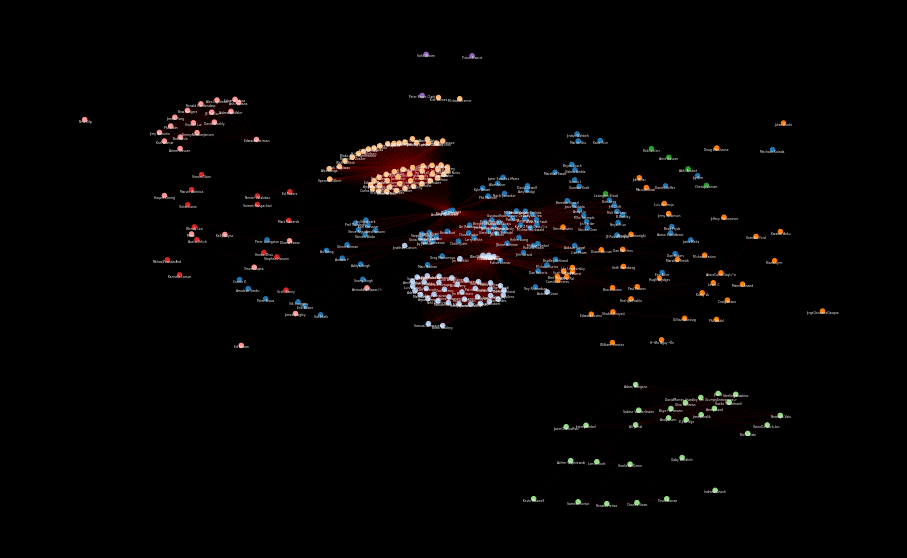

In [216]:
draw_clu(G0, pos,partitions,"skillsgraph.pdf")

In [222]:
## saving skill set graph
nx.write_gexf(G, "skillset98.gexf")

## Making graph using position descritption textual data for each user

- will do text preprocessing this time as the description have stop words to remove.

In [51]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+") #for removel of punchuation 

In [52]:
def nltk_tokenizer(sentence):
    tokens = []
    for word in tokenizer.tokenize(sentence):
        word=word.lower()
        if word in stopwords:
            continue
        if (len(word) < 3): # words with length less then 1
            continue
        if (word == " "): #space
            continue
        if not (word.isalpha()):
            continue
        tokens.append(word)
    return tokens

In [53]:
ls = []
for text in (position_Df.position):
    st = " ".join(text)
    ls.append(st)

In [54]:
# creating pre-processed corpus of text
from tqdm import tqdm
processed_text = []

for text in tqdm(ls):
    tokens = ""
    for word in nltk_tokenizer(text.lower()):
        tokens+=word+" "
        
    processed_text.append(tokens)
print("The tokenized data is ready") 

100%|█████████████████████████████████████| 1687/1687 [00:01<00:00, 1593.02it/s]

The tokenized data is ready


In [55]:
position_Df["cleaned_text"] = processed_text

In [56]:
position_Df.head()

,name,position,cleaned_text
0,Brian Frenzel,[Tosk discovers and develops drugs to improve ...,tosk discovers develops drugs improve outcomes...
1,George Jones,[Woodside Capital Partners is a global indepen...,woodside capital partners global independent i...
2,Amos Ben-Meir,[Board Roles: 2022: VP LLC Management 2021: Tr...,board roles llc management treasurer llc manag...
3,Khaja Syed,[Khaja Syed has been responsible for growing C...,khaja syed responsible growing communityforce ...
4,Leonard Mcgill,[Outside GC LLC and its sister firm Patent GC ...,outside llc sister firm patent innovative law ...


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
def tf(data):
    print(">>TF-IDF partitioning process")
    tfidf = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 10000,tokenizer=nltk_tokenizer).fit_transform(tqdm(data["cleaned_text"]))
    return tfidf

In [58]:
tfidf=tf(position_Df)

>>TF-IDF partitioning process


100%|█████████████████████████████████████| 1687/1687 [00:00<00:00, 1963.84it/s]


In [59]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf, tfidf)

In [60]:
dic = {}
i = 0
for sim in cosine_similarities:
    related_docs_indices = sim.argsort()[:-50:-1]
    ls  = []
    for indices in related_docs_indices:
        ls.append((indices, sim[indices]))
    dic[i] = ls
    i+=1

In [61]:
names = position_Df.name

In [217]:
G2 = nx.Graph()
for i in range(0, len(position_Df)):
    for j in dic[i]:
        if(j[0] == i):continue
        elif(j[1]>0.25):
            if(G2.has_edge(names[i], names[j[0]])):continue
            else:G2.add_edge(names[i], names[j[0]])

In [218]:
nx.info(G2)

'Graph with 763 nodes and 1557 edges'

In [210]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G2 = G2.subgraph(Gcc[0])
pos = nx.kamada_kawai_layout(G2)

In [211]:
partition2 = community.best_partition(G2)

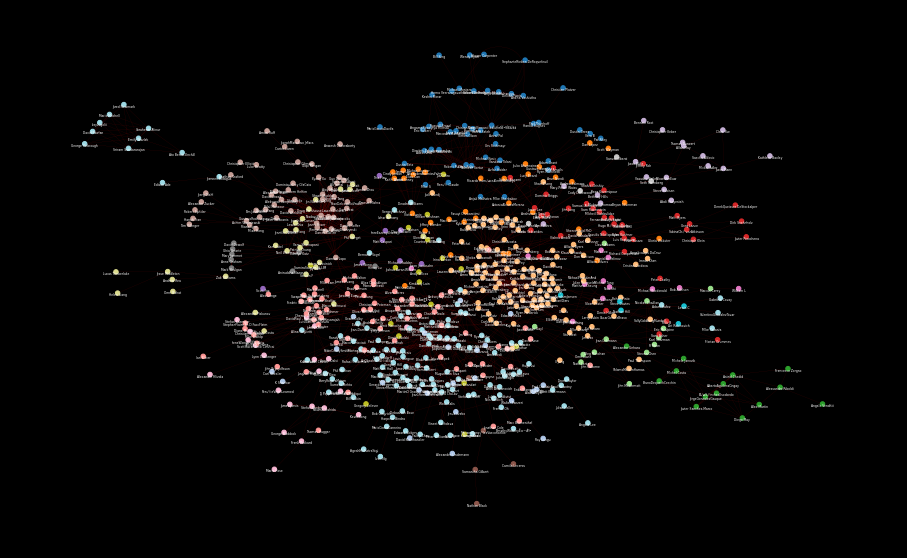

In [212]:
draw_clu(G2,pos,partition2, "positionsgraph.pdf")

In [219]:
## saving graphs for better visualization
## the example graph that you shown us is created using gephi
## i have made grap visualizaitons for both of Graphs skill sets and positions based
nx.write_gexf(G2, "positiongraph.gexf")